In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Features of the data set**

Name: Name of the Book. String

Author: The author of the Book. String

User Rating: Amazon user rating. Float

Reviews: Number of written reviews on amazon. Float

Price: The price of the book (AS at 12/10/2020). Float

Year: The year(s) it ranked on the bestseller. Data

Genere: Whether fiction or non-function. String

In [ ]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
data.shape

(550, 7)

In [ ]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [ ]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

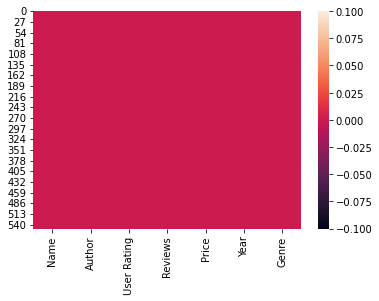

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

**Outlier Detection and Treatment**

Outlier Detection
Outlier are extreme values that deviate from other observations on data, they may indicate a variability in a measurement experimental error or a novelty.

Boxplots are a great way of detecting outliers. once the outlies have been detected,

--they can imputed with the 5th and 95th percentiles

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


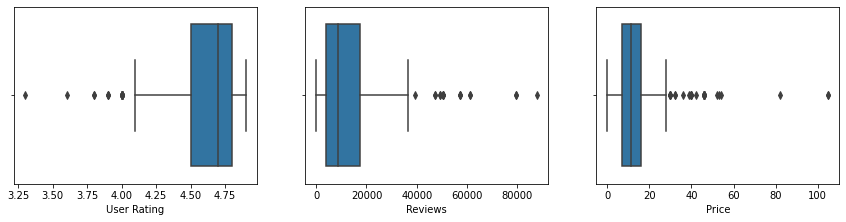

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

**numpy.clip() function is used to Clip (limit) the values in an array**

Systax : numpy.clip(a, a_min, a_max out=None)

Parameters:

a :Array containing elements to clip.

a_min : Minimum value.

-> if None, Clipping is not performed on lower interval edge. Not more than one of_min and a_max may be None.

a_max : Maximun value.

In [ ]:
data['Price']=data['Price'].clip(lower=data['Price'].quantile(0.05), upper=data['Price'].quantile(0.95))

In [ ]:
data['User Rating']=data['User Rating'].clip(lower=data['User Rating'].quantile(0.05), upper=data['User Rating'])

In [ ]:
data['Reviews']=data['Reviews'].clip(lower=data['Reviews'].quantile(0.05), upper=data['Reviews'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


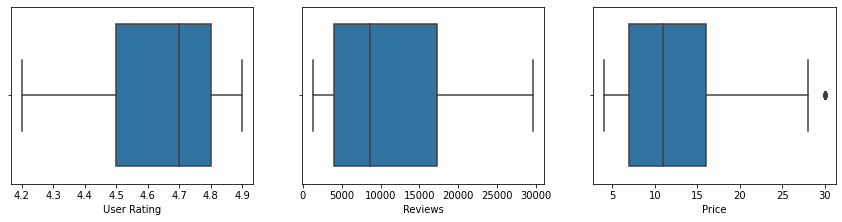

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

**Explore trend over year for each genre:**


Number of best-selling books in each genre each year:

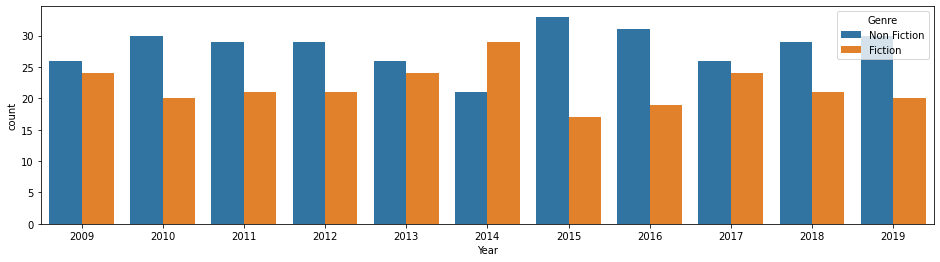

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='Year', data=data, hue='Genre')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    float64
 4   Price        550 non-null    float64
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB
